# ECE 417 Lecture 12: Mixture Gaussian Models
## Mark Hasegawa-Johnson, October 10, 2017
This file is distributed under a <a href="https://creativecommons.org/licenses/by/3.0/">CC-BY</a> license.  You may freely re-use or re-distribute the whole or any part.  If you re-distribute a non-trivial portion of it, give me credit.

## Outline of Today's lecture
* Jupyter notebook
* Discriminant-based classifier; Bayesian classifier
* Downloading some example data
* Likelihood models: Gaussian
* Gaussian classifier
* Likelihood models: Mixture Gaussian
* Mixture Gaussian classifier

## Jupyter Notebook
* A Jupyter notebook is a document with two types of cells: code cells, and markdown cells.  
* <strong>Code cells</strong> contain python code.  When you click "play" (or hit Shift-Enter), the code runs.  Results are shown immediately after the cell.  Results might include printed text, or matplotlib plots.
* <strong>Markdown cells</strong>, like this one, contain text.  Text is formatted using wiki-style markdown.
* The whole notebook is available on the course web page.  I strongly encourage you to download it, edit the code snippets, and re-run them, in order to get a better understanding of the lecture material.

The first thing to do is to load all of the standard python libraries that we'll need.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests
%matplotlib inline

## Discriminant-based classifiers: all classifiers can be written this way
* A classifier reads in a sample, $\vec{x}$, and tries to determine what label to give it.  Let's assume that $\vec{x}$ is a
$D$-dimensional real vector, so we can write $$\vec{x}\in\Re^D$$.
* Usually the label is an integer, $y$.  For example, if there are $C$ different classes, then we can say that $$y\in\left\{0,1,\ldots,C-1\right\}$$.
* Any classifier can be summarized by a set of discriminant function $g_y(\vec{x})$.  The The discriminant function $g_y(\vec{x})$ takes a datum, and produces a real-valued score.
* Given a particular input $\vec{x}$, the classifier tries each discriminant function, one after the other,
and outputs whichever label has the best score.
$$\hat{y}=\arg\max_y g_y(\vec{x})$$
where the notation $\hat{y}$ means "the value of y chosen by the classifier."
* So, for example, suppose that there are only two classes: $y=0$ and $y=1$.  Then the classifier would have the 
following decision rule:
$$\hat{y}=\left\{\begin{array}{ll} 1 & g_1(\vec{x}) > g_0(\vec{x})\\
  0 & \mbox{otherwise}\end{array}\right.$$



## Bayesian classifiers: If the discriminant is a monotonic function of p(y|x)
A Bayesian classifier (also known as a MAP classifier, also known as a minimum-probability-of-error or MPE classifier) is one
for which the discriminant function is the posterior probability of $y$ given $\vec{x}$:
$$\mbox{one possibility:}~~~g_y(\vec{x}) = p_{Y|X}(y|\vec{x})$$
... or any monotonic function of that.  

For example, from the definition of conditional probability, we get
$$\hat{y}=\arg\max_y p_{Y|X}(y|\vec{x}) = \arg\max_y\frac{p_{X,Y}(\vec{x},y)}{p_X(\vec{x})}
=\arg\max_y p_{X,Y}(\vec{x},y)$$
so instead of using the posterior probability as the discriminant function, we could use the joint probability

$$\mbox{another possibility that gives the same result:}~~~g_y(\vec{x})=p_{X,Y}(\vec{x},y)$$

On the other hand, logarithm is a monotonic function, so
$$\hat{y}=\arg\max_y p_{X,Y}(\vec{x},y) = \arg\max_y \ln p_{X,Y}(\vec{x},y)$$
so we could use
$$\mbox{yet another possibility that gives the same result:}~~~g_y(\vec{x})=\ln p_{X,Y}(\vec{x},y)$$

It's particularly useful to divide that into the prior probability $p_Y(y)$, and the likelihood $p_{X|Y}(\vec{x}|y)$.  The reason it's useful: because $p_Y(y)$ is just a lookup table, and $p_{X|Y}(\vec{x}|y)$ is often much, much easier to learn from data than is $p_{Y|X}(y|\vec{x})$.  Thus we often want to use this discriminant:

$$\mbox{This one usually is easiest to compute and use:}~~~g_y(\vec{x})=\ln p_Y(y) + \ln p_{X|Y}(\vec{x}|y)$$

# Bayesian classifiers: terminology
You need to know these four terms.  If $\vec{x}$ is the observation and $y$ is the class label, then
* Posterior: $p_{Y|X}(y|\vec{x})$          ----- probability of a class given a feature,pmf depending on x, estimate using knn
* Likelihood: $p_{X|Y}(\vec{x}|y)$          ----- probability of a feature given a class, multiply likelyhood to prior to get postetrior
* Prior: $p_Y(y)$          ---- probability of class
* Evidence: $p_X(\vec{x})$          ----- probability of feature

# Downloading some example data
So let's talk about how to estimate the likelihood function.  First, let's get some data.  Here I'll download the "Iris" dataset, which is the one that Fisher used in the paper where he invented linear discriminant analysis.

In [5]:
# Download data from the UCI repository
r=requests.get('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
# Split at every newline; split each line at commas
dataset = [ x.split(',') for x in r.text.split('\n') ]
dataset


[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'Iri

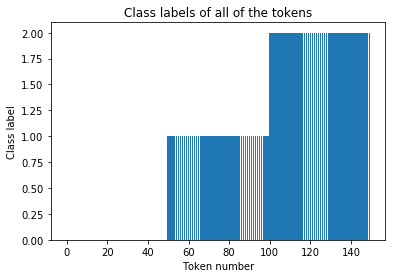

In [6]:
# Get a dictionary from labels t indices, and back again
label2class = { 'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 }
class2label = { 0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica' }
# Read out a list of the class labels, convert to integers
Y = [ label2class[x[4]] for x in dataset if len(x)==5 ]
# Plot the class labels of each token
plt.bar(range(0,len(Y)),Y)
plt.title('Class labels of all of the tokens')
plt.xlabel('Token number')
plt.ylabel('Class label')

In [7]:
# Create a numpy arrays for each data subset
X = np.array([ x[0:4] for x in dataset if len(x)==5 ], dtype='float64')
X.shape

(150, 4)

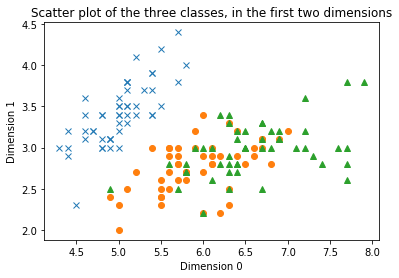

In [8]:
# Plot a scatter plot of the three classes, so we can see how well they separate in the first two dimensions
plt.plot(X[0:50,0],X[0:50,1],'x',X[50:100,0],X[50:100,1],'o',
        X[100:150,0],X[100:150,1],'^')
plt.title('Scatter plot of the three classes, in the first two dimensions')
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')

# Likelihood models: Gaussian
Now let's build a Gaussian model of each of those classes, and see how well it fits.

[ 5.006  3.418  1.464  0.244]
[ 5.936  2.77   4.26   1.326]
[ 6.588  2.974  5.552  2.026]


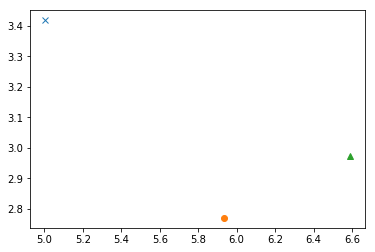

In [10]:
# Compute the mean of each class.  axis=0 means to compute the average row vector 
mu0 = np.mean(X[0:50,:],axis=0)
mu1 = np.mean(X[50:100,:],axis=0)
mu2 = np.mean(X[100:150,:],axis=0)
print(mu0)
print(mu1)
print(mu2)
plt.plot(mu0[0],mu0[1],'x',mu1[0],mu1[1],'o',mu2[0],mu2[1],'^')

In [11]:
# Compute the covariance of each class.
Sig0 = np.cov(X[0:50,:],rowvar=False)
Sig1 = np.cov(X[50:100,:],rowvar=False)
Sig2 = np.cov(X[100:150,:],rowvar=False)
[ Sig0, Sig1, Sig2 ]

[array([[ 0.12424898,  0.10029796,  0.01613878,  0.01054694],
        [ 0.10029796,  0.14517959,  0.01168163,  0.01143673],
        [ 0.01613878,  0.01168163,  0.03010612,  0.00569796],
        [ 0.01054694,  0.01143673,  0.00569796,  0.01149388]]),
 array([[ 0.26643265,  0.08518367,  0.18289796,  0.05577959],
        [ 0.08518367,  0.09846939,  0.08265306,  0.04120408],
        [ 0.18289796,  0.08265306,  0.22081633,  0.07310204],
        [ 0.05577959,  0.04120408,  0.07310204,  0.03910612]]),
 array([[ 0.40434286,  0.09376327,  0.3032898 ,  0.04909388],
        [ 0.09376327,  0.10400408,  0.07137959,  0.04762857],
        [ 0.3032898 ,  0.07137959,  0.30458776,  0.04882449],
        [ 0.04909388,  0.04762857,  0.04882449,  0.07543265]])]

In [12]:
# Create a coordinate system on which we can calculate the Gaussian pdf
x0coords, x1coords = np.mgrid[4:8:0.01,2:4.5:0.01]
# Combine x0coords and x1coords into an array that we can use in the plt.contourf function
# ... this syntax is copied from the scipy.stats.multivariate_normal web page
coords = np.empty(x0coords.shape + (2,))
coords[:,:,0] = x0coords
coords[:,:,1] = x1coords
coords.shape

(400, 250, 2)

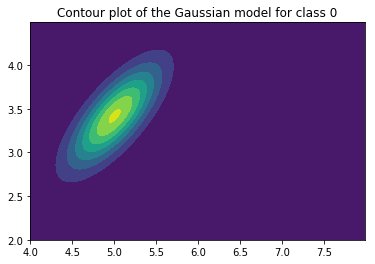

In [15]:
# Calculate the Gaussian pdfs at the same set of points
pdf0 = stats.multivariate_normal(mu0[0:2],Sig0[0:2,0:2]).pdf(coords)
pdf1 = stats.multivariate_normal(mu1[0:2],Sig1[0:2,0:2]).pdf(coords)
pdf2 = stats.multivariate_normal(mu2[0:2],Sig2[0:2,0:2]).pdf(coords)
plt.contourf(x0coords,x1coords,pdf0)
plt.title('Contour plot of the Gaussian model for class 0')

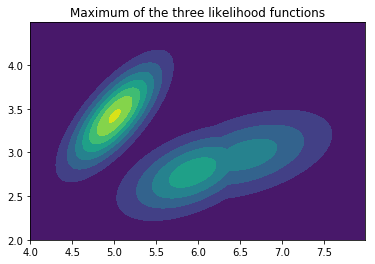

In [16]:
# Show contour plot of the maximum of all three classes
maxpdf = np.maximum(pdf0,np.maximum(pdf1,pdf2))
plt.contourf(x0coords,x1coords,maxpdf)
plt.title('Maximum of the three likelihood functions')

# Gaussian classifier
A Gaussian classifier is just a Bayesian classifier, with a Gaussian pdf.

Remember that a Bayesian classifier means that
$$\hat{y} = \arg\max_y \ln p_Y(y)+\ln p_{X|Y}(\vec{x}|y)$$

A Gaussian classifier is one in which $p_{X|Y}(\vec{x}|y)$ is Gaussian:
$$p_{X|Y}(\vec{x}|y)={\mathcal N}(\vec{x};\vec{\mu}_y,\Sigma_y)$$

Suppose that all of the classes have equal priors, $p_Y(y)=\frac{1}{3}$ for the cases of three classes.  Then the Gaussian classifier is just 
$$\hat{y} = \arg\max_y {\mathcal N}(\vec{x};\vec{\mu}_y,\Sigma_y)$$

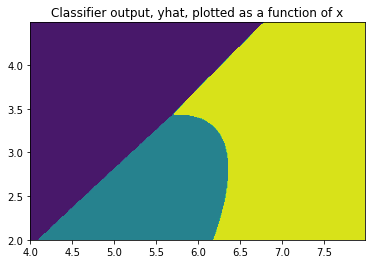

In [17]:
# Find the (x0,x1) coordinates for which class 0 is the best choice
yhat_is_0 = (pdf0 == maxpdf)
yhat_is_1 = (pdf1 == maxpdf)
yhat_is_2 = (pdf2 == maxpdf)
yhat = yhat_is_1 + 2*yhat_is_2
# Now let's plot that
plt.contourf(x0coords,x1coords,yhat)
plt.title('Classifier output, yhat, plotted as a function of x')

### Check our results: Gaussian borders must be quadratic

Remember that the Gaussian pdf is given by 
$$\hat{y} = \arg\max p_{X|Y}(\vec{x}|y) = \arg\max \ln p_{X|Y}(\vec{x}|y)$$

But the logarithm of a Gaussian is a quadratic function of $\vec{x}$:
$$\ln p_{X|Y}(\vec{x}|y) = -d_\Sigma^2(\vec{x},\vec{\mu}_y) + \mbox{constant}$$

So the boundary between any two classes, in a Gaussian classifier, needs to be either a straight line, or a quadratic.

For example, the boundary between class 0 and class 1 is the set of points such that the mahalanobis distance between class 0 and class 1 are equal plus some constants. Close to a knn classifiyer, but use mahalanobis distance instead of euclidiean distance to the nearest mean.

# Likelihood models: Gaussian mixture model (GMM)

So, notice that pdf2 is looking elliptical here, even though the data distribution wasn't really very elliptical.  Let's analyze that a little more carefully, by drawing a scatter plot of the same data on top of the countour plot.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


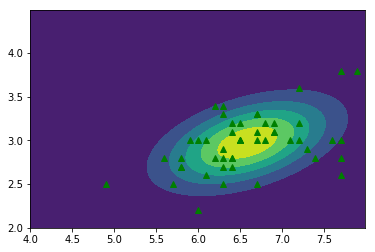

In [18]:
plt.contourf(x0coords,x1coords,pdf2)
plt.hold(True)
plt.plot(X[100:150,0],X[100:150,1],'g^')

# GMM definition
A GMM models the likelihood of each class as the weighted sum of $K$ different Gaussians, like this:
$$p_{X|Y}(\vec{x}|y) = \sum_{k=1}^K c_k {\mathcal N}(\vec{x};\vec\mu_{yk},\Sigma_{yk})$$

Notice that we've increased the number of parameters by a factor of $K$.  A Gaussian model has just one $D\times D$ covariance matrix per class.  A GMM has $K$ of them.  There are two possible solutions to avoid parameter overload:
* Make $K$ small, or
* Make the covariance matrix diagonal
In this lecture I'll use the first solution, and just set $K=2$ Gaussians per class.  In the real world, though, people are more likely to use the second solution --- to set $K$ to a pretty big number, and then to use diagonal covariance matrices.

### Constraints on the mixture weights
Here are some facts you know about pdfs in general:
* They must be non-negative, i.e., $p_X(\vec{x})\ge 0$ for all $\vec{x}$.
* They must integrate to 1.0, i.e., $$\int p_X(\vec{x})d\vec{x}=1$$

The Gaussian is a valid pdf.  That means that these things are true for a Gaussian:
$${\mathcal N}(\vec{x};\vec\mu,\Sigma)\ge 0,~~~\mbox{and}~~~\int {\mathcal N}(\vec{x};\vec\mu,\Sigma)d\vec{x}=$$

Since these things are already true for each of the Gaussians separately, making them true for the GMM is simple.  We just have to choose the right mixture weights, $c_k$.  In fact, the rules are easy:
* The mixture weights have to be non-negative, $c_k\ge 0$
* The mixture weights have to sum to one: $$\sum_{k=1}^K c_k = 1$$

### Constraints on the covariance matrices
The covariance matrix has to be positive semi-definite, meaning that it has to have all non-negative eigenvalues.

In fact, a positive-semidefinite covariance matrix is kind of hard to deal with --- it's better if you keep it positive definite, instead.  This can be done by finding the eigenvalues, then if there are any zero-valued eigenvalues, just add a small constant to each one.  Usually people add a constant somewhere between 0.01 and 0.001, then check to see if their results make sense.

## Learning a GMM from data
OK, the title of this slide is a lie.  I'm not going to tell you, yet, how to learn a GMM from data.  I'll tell you about that in the next lecture.

For now, let's just look at the scatter plot for class $y=2$, the Iris-virginica class.  Notice that you could draw an ellipse around all the data points with $x_0<6.8$, and you could draw another ellipse around all the data points with $x_0>6.8$.  So let's arbitrarily divide the data into those two halves, and find the mean and covariance of each of those two half-datasets.

WARNING: this is not the way you should ever train a GMM in practice.  You'll learn a much better method in the next lecture.

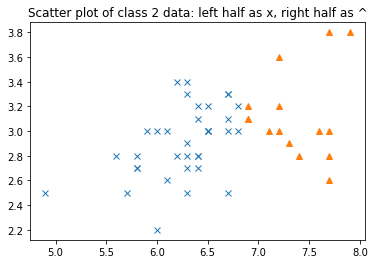

In [21]:
# Arbitrarily split the class-2 data into two halves, at the threshold x0=6.8
class2 = X[100:150,:]
class2_left = class2[class2[:,0] <= 6.8,:]
class2_right = class2[class2[:,0] > 6.8,:]
plt.plot(class2_left[:,0],class2_left[:,1],'x',class2_right[:,0],class2_right[:,1],'^')
plt.title('Scatter plot of class 2 data: left half as x, right half as ^')

In [31]:
# Now we'll estimate the mixture weights, mean, and covariance of the Gaussians on the left half and right half
c_2_0 = class2_left.shape[0]/class2.shape[0]
c_2_1 = class2_right.shape[0]/class2.shape[0]
# mu_2_0 = np.mean(class2_left[:,0:2],axis=0)
# mu_2_1 = np.mean(class2_right[:,0:2],axis=0)
# Sig_2_0 = np.cov(class2_left[:,0:2],rowvar=False)
# Sig_2_1 = np.cov(class2_right[:,0:2],rowvar=False)
mu_2_0 = np.mean(class2_left,axis=0)
mu_2_1 = np.mean(class2_right,axis=0)
Sig_2_0 = np.cov(class2_left,rowvar=False)
Sig_2_1 = np.cov(class2_right,rowvar=False)
# Just as a check, print the mixture weights, and the two mean vectors
[ [c_2_0, c_2_1], mu_2_0, mu_2_1 ]

[[0.7, 0.3],
 array([ 6.25714286,  2.90857143,  5.30857143,  2.        ]),
 array([ 7.36      ,  3.12666667,  6.12      ,  2.08666667])]

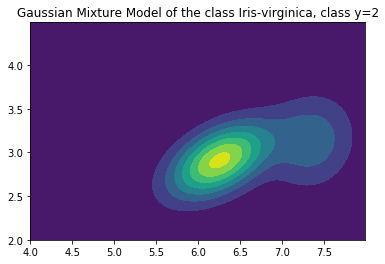

In [32]:
# Now let's calculate the GMM model of class 2
gaussian_2_0 = stats.multivariate_normal(mu_2_0[0:2],Sig_2_0[0:2,0:2]).pdf(coords)
gaussian_2_1 = stats.multivariate_normal(mu_2_1[0:2],Sig_2_1[0:2,0:2]).pdf(coords)
gmm_pdf2 = c_2_0*gaussian_2_0 + c_2_1*gaussian_2_1
# And let's plot its contour plot
plt.contourf(x0coords,x1coords,gmm_pdf2)
plt.title('Gaussian Mixture Model of the class Iris-virginica, class y=2')

# GMM Classifier
A GMM classifier is a Bayesian classifier in which one or more of the classes has a GMM likelihood function.

So the classification function is
$$\hat{y}=\arg\max_y p_Y(y)p_{X|Y}(\vec{x},y)$$

where $p_{X|Y}(\vec{x}|y)$ is a GMM for at least one of the classes.

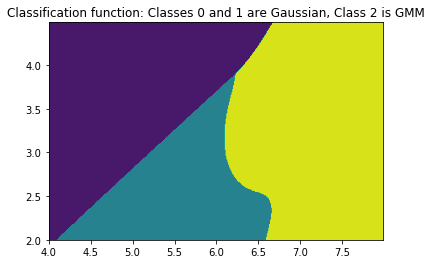

In [33]:
# Let's try creating a classifier.
# We'll use Gaussian models for classes 0 and 1, 
# and a GMM for class 2
maxpdf = np.maximum(pdf0,np.maximum(pdf1,gmm_pdf2))
yhat_using_gmm = (pdf1==maxpdf) + 2*(gmm_pdf2==maxpdf)
plt.contourf(x0coords,x1coords,yhat_using_gmm)
plt.title('Classification function: Classes 0 and 1 are Gaussian, Class 2 is GMM')

### Check our results: GMM boundaries don't need to be quadratic!!
Remember that in a Gaussian classifier, the border between any two classes needs to be quadratic or linear.  In a GMM classifier, that's no longer true.  Roughly speaking, the border can have as many wiggles as the GMM has Gaussians.